In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("train_new.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0.5, 1.0, 'Correlation ')

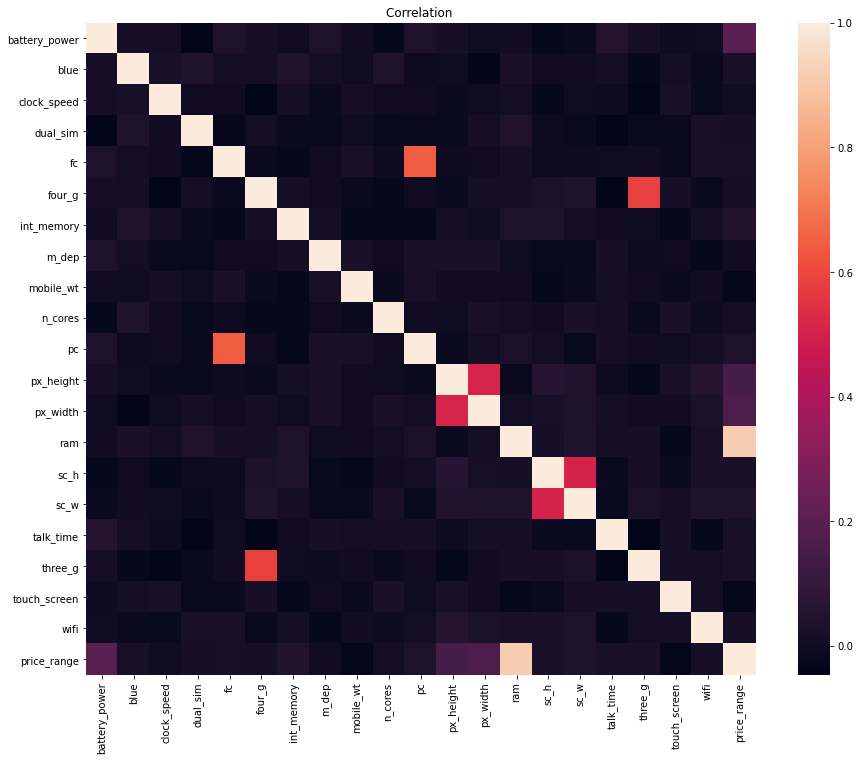

In [3]:
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr)
r.set_title("Correlation ")

In [4]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [9]:
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.97125
test accuracy: 0.8375


In [ ]:
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [13]:
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']
x test features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']


In [14]:
C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9637499999999999
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


In [15]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm_model.fit(x_new,y_train)

SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

In [16]:
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.964375
test_accuracy:  0.9375
